### Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
np.random.seed(42)

### Spam,  not Spam model

In [3]:
df = pd.read_csv('../Data/Merged_cvec_data.csv')

In [4]:
df.head()

,00,000,0000,000000,00000000,00000001,00000009,0000011,00001,000018ea0000,...,𝒘𝒐𝒖𝒍𝒅,𝗜𝗻𝘀𝘁𝗮𝗴𝗿𝗮𝗺,𝗧𝗢,𝗼𝗻,𝟏𝟔𝟓𝒌,𝟐𝟗𝟖,𝟓𝟑𝟔𝟐,𝟔𝟏𝟖𝟔𝟎𝟎𝟕𝟑𝟒𝟎𝟒,𝟕𝟐𝟓,scam_notscam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
X = df.drop(columns=['scam_notscam'])
y = df['scam_notscam']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)

In [18]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [19]:
logr.score(X_train, y_train)

1.0

In [20]:
logr.score(X_test, y_test)

0.9903329752953813

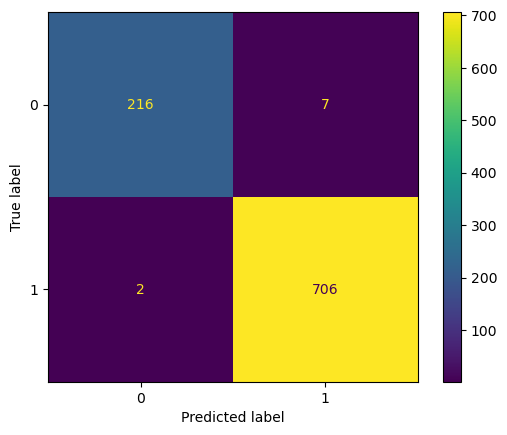

In [21]:
ConfusionMatrixDisplay.from_estimator(logr, X_test, y_test)

In [10]:
y_pred = logr.predict(X)
predicts = pd.DataFrame({'Predictions': y_pred})
predicts.to_csv('../Data/Spam_notSpam_Predictions.csv', index=False)

### Phishing or Malware Baseline Model

In [11]:
df1 = pd.read_csv('../Data/CVEC_phishing_malware.csv')
df1.head()

,00,000,0000,000000,00000000,00000001,00000009,0000011,00001,000018ea0000,...,𝒘𝒐𝒖𝒍𝒅,𝗜𝗻𝘀𝘁𝗮𝗴𝗿𝗮𝗺,𝗧𝗢,𝗼𝗻,𝟏𝟔𝟓𝒌,𝟐𝟗𝟖,𝟓𝟑𝟔𝟐,𝟔𝟏𝟖𝟔𝟎𝟎𝟕𝟑𝟒𝟎𝟒,𝟕𝟐𝟓,phis_orMal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
X1 = df1.drop(columns=['phis_orMal'])
y1 = df1['phis_orMal']

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
logr1 = LogisticRegression()
logr1.fit(X1_train, y1_train)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
logr1.score(X1_train, y1_train)

0.9966618979494516

In [15]:
logr1.score(X1_test, y1_test)

0.7357142857142858

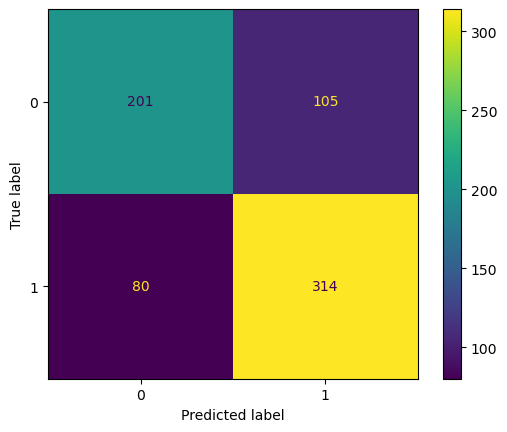

In [16]:
ConfusionMatrixDisplay.from_estimator(logr1, X1_test, y1_test)